### Load materias

In [1]:
import pandas as pd
materias_df = pd.read_csv('output/materias/senate-materias-2017.csv', index_col='CodigoMateria')

In [2]:
materias_df.head(10)
materias_df[materias_df.index == 128185]

,SiglaCasaMateria,SiglaSubtipoMateria,AnoMateria,DescricaoMateria,EmentaMateria,ExplicacaoEmentaMateria,DataApresentacao,NomeNatureza,CodigoParlamentarAutor,NomeParlamentarAutor,SexoParlamentarAutor,UfParlamentarAutor,PartidoParlamentarAutor,SiglaSituacaoMateria,SiglaLocalMateria,CodigosRelatoresMateria
CodigoMateria,,,,,,,,,,,,,,,,
128185,SF,PLS,2017,PLS 00035/2017,"Altera a Lei nº 10.826, de 22 de dezembro de 2...",NaN,2017-02-22,NORMA_GERAL,5132,Dalirio Beber,Masculino,SC,PSDB,RTPA,COARQ,NaN


### Show statistics

In [3]:
import matplotlib.pyplot as plt
s = materias_df.groupby(['SexoParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('Sexo')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<Figure size 640x480 with 1 Axes>

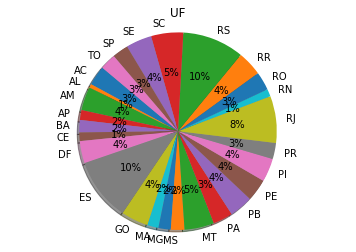

In [4]:
s = materias_df.groupby(['UfParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('UF')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

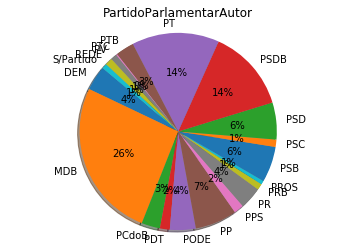

In [5]:
s = materias_df.groupby(['PartidoParlamentarAutor']).size()
s = tuple(zip(s,s.index))
plt.title('PartidoParlamentarAutor')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

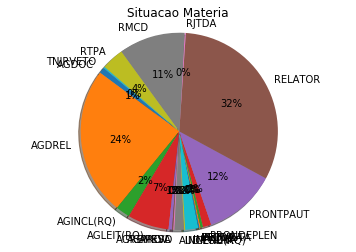

In [6]:
s = materias_df.groupby(['SiglaSituacaoMateria']).size()
s = tuple(zip(s,s.index))
plt.title('Situacao Materia')
plt.pie([x[0] for x in s],
        labels=[x[1] for x in s],
        autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

(515,)
CodigosRelatoresMateria
0    308
1    149
2     43
3     11
4      3
5      1
Name: CodigosRelatoresMateria, dtype: int64


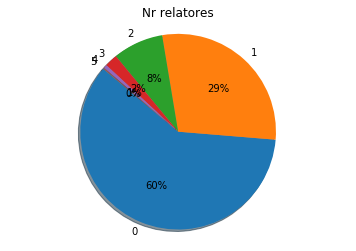

In [7]:
relatores = materias_df['CodigosRelatoresMateria'].str.split()
def count(a):
    try:
        return len(a)
    except:
        return 0

relatores = relatores.apply(count)
relatores.rename('nr')
print(relatores.shape)
relatores = relatores.groupby(relatores).size()
print(relatores)

plt.title('Nr relatores')
plt.pie(relatores, labels=[x for x in range(len(relatores))],
       autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Explore materia contents

In [11]:
import modules.nlputils as nlputils
from wordcloud import WordCloud

def plot_wordcloud(document_contents):
    words = []
    for t in document_contents:
        for a in t:
            words.append(a)
    text = ''
    text = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=40, random_state=42).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

All materias 2017
qtty=515


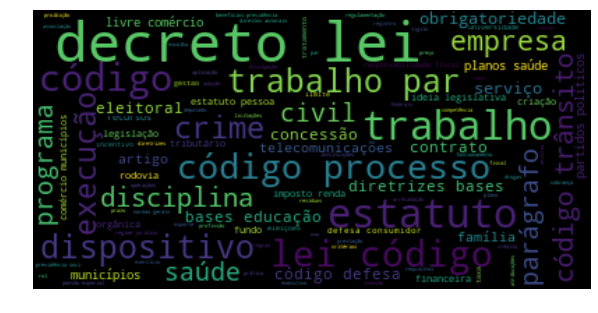

In [14]:
from modules.nlputils import StemFilterTokenizeProcessor

materias_df = pd.read_csv('output/materias/senate-materias-2017.csv', index_col='CodigoMateria')
materias_df['conteudo'] = materias_df[['EmentaMateria', 'ExplicacaoEmentaMateria']].apply(lambda x: ''.join(str(x)), axis=1)
materias = materias_df[['conteudo']]
materias = [s[0] for s in materias.values[:]]
print('All materias 2017')
print('qtty=' + str(len(materias)))

stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
proc = StemFilterTokenizeProcessor(stopwords, min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
tokens = proc.tokenize_documents(materias)

plot_wordcloud(tokens)